# Seleção de recursos com o pacote Caret R

A importância dos recursos pode ser estimada a partir de dados construindo um modelo. Alguns métodos, como árvores de decisão, têm um mecanismo construído para relatar uma importância variável. Para outros algoritmos, a importância pode ser estimada usando uma análise da curva ROC realizada para cada atributo.

O exemplo abaixo carrega o conjunto de dados de Diabetes dos índios Pima e constrói um modelo de Quantização de Vector de Aprendizagem (LVQ). O varImp é usado para estimar a importância da variável, que é impressa e plotada. Isso mostra que os atributos de glicose, massa e idade são os 3 principais atributos mais importantes no conjunto de dados e o atributo de insulina é o menos importante.

In [3]:
set.seed(7)
library(mlbench)
library(caret)

## Load Data Set

In [63]:
dados.vendas <- read.csv("data/food-sp.csv", header=TRUE)
dados.vendas = as.data.frame(dados.vendas)
dados.vendas[is.na(dados.vendas)] <- 0
dados.vendas = dados.vendas[, c('VENDA', 
                                'LANCHE.FRANQUEADO', 
                                'CHOPP.COM.UNIDADE.EM.LITRO', 
                                'ACOMPANHAMENTO', 
                                'SACHET.MOLHO.PINCANHA', 
                                'SANDUICHE', 
                                'BEX.CAFE', 
                                'PROJETO.CAFÉ', 
                                'BEX.SANDUICHES.E.MOLHOS', 
                                'BEX.DOCES', 
                                'MOLHO.FESTIVAL', 
                                'PRATO', 
                                'CALDA.BOBS.TOP', 
                                'DOCE.E.TORTA', 
                                'BEX.SNACKS', 
                                'LINHA.ORIGINAL', 
                                'BEX.BEBIDAS', 
                                'MOLHO', 
                                'REFEICAO.COLABORADORES', 
                                'GELADO.E.MILK.SHAKE', 
                                'BRINDE', 
                                'ADICIONAL', 
                                'BEX.GELADOS.E.MILKSHAKES', 
                                'BEX.SALADAS', 
                                'PROJETO.CHOPP', 
                                'BEBIDA', 
                                'BEBIDA.COM.UNIDADE.EM.LITRO', 
                                'ITENS.DE.COMPOSIÇÃO', 
                                'OUTROS'
                               )]

In [103]:
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)

# train the model
#lm, rf
#RMSE, Rsquared
model <- train(VENDA ~ ., data=dados.vendas, 
               method="lm", 
               metric="RMSE", 
               preProcess="scale", 
               trControl=control, 
               importance = TRUE)

# estimate variable importance
importance <- varImp(model, scale=TRUE)

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: LANCHE.FRANQUEADO, CHOPP.COM.UNIDADE.EM.LITRO, LINHA.ORIGINAL, MOLHO, BEBIDA.COM.UNIDADE.EM.LITRO, OUTROS”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: LANCHE.FRANQUEADO, CHOPP.COM.UNIDADE.EM.LITRO, LINHA.ORIGINAL, MOLHO, BEBIDA.COM.UNIDADE.EM.LITRO, OUTROS”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0

In [83]:
# summarize importance
print(importance)

lm variable importance

  only 20 most important variables shown (out of 22)

                           Overall
GELADO.E.MILK.SHAKE      100.00000
SANDUICHE                 29.58550
BEBIDA                    10.99501
ACOMPANHAMENTO            10.43567
ADICIONAL                  2.26190
PROJETO.CAFÉ               2.07714
BRINDE                     2.02808
PRATO                      1.24978
BEX.SANDUICHES.E.MOLHOS    0.71307
DOCE.E.TORTA               0.60846
BEX.CAFE                   0.42660
PROJETO.CHOPP              0.29642
ITENS.DE.COMPOSIÇÃO        0.19628
BEX.GELADOS.E.MILKSHAKES   0.15683
REFEICAO.COLABORADORES     0.11897
BEX.BEBIDAS                0.05792
BEX.SNACKS                 0.04057
BEX.DOCES                  0.03162
MOLHO.FESTIVAL             0.02203
SACHET.MOLHO.PINCANHA      0.01516


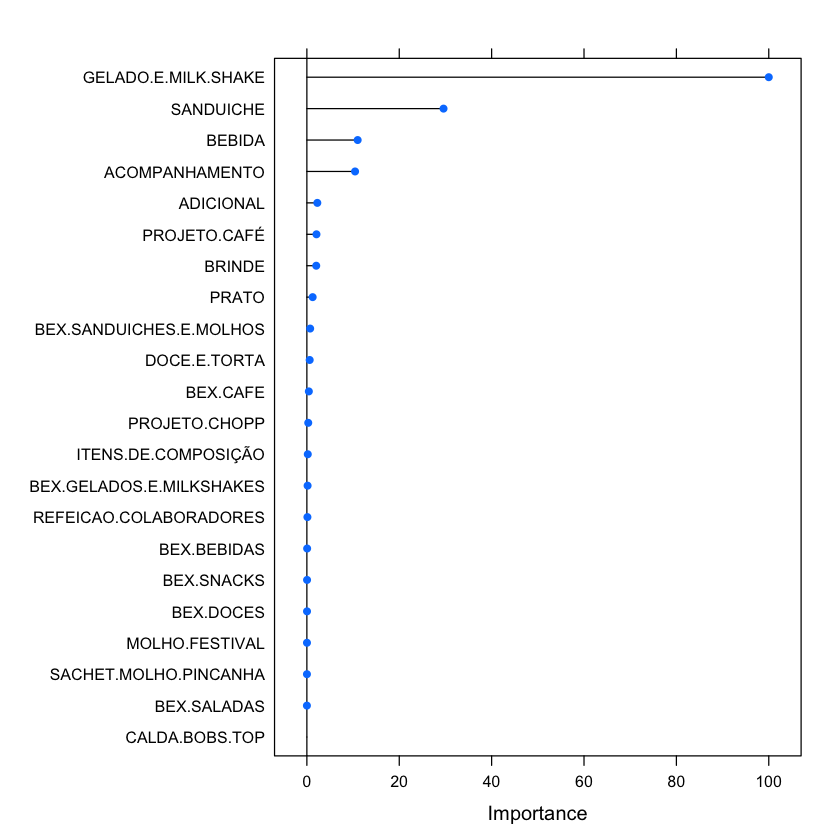

In [84]:
# plot importance
plot(importance)

In [87]:
colnames(dados.vendas)

[1] "VENDA"                       "LANCHE.FRANQUEADO"          
 [3] "CHOPP.COM.UNIDADE.EM.LITRO"  "ACOMPANHAMENTO"             
 [5] "SACHET.MOLHO.PINCANHA"       "SANDUICHE"                  
 [7] "BEX.CAFE"                    "PROJETO.CAFÉ"               
 [9] "BEX.SANDUICHES.E.MOLHOS"     "BEX.DOCES"                  
[11] "MOLHO.FESTIVAL"              "PRATO"                      
[13] "CALDA.BOBS.TOP"              "DOCE.E.TORTA"               
[15] "BEX.SNACKS"                  "LINHA.ORIGINAL"             
[17] "BEX.BEBIDAS"                 "MOLHO"                      
[19] "REFEICAO.COLABORADORES"      "GELADO.E.MILK.SHAKE"        
[21] "BRINDE"                      "ADICIONAL"                  
[23] "BEX.GELADOS.E.MILKSHAKES"    "BEX.SALADAS"                
[25] "PROJETO.CHOPP"               "BEBIDA"                     
[27] "BEBIDA.COM.UNIDADE.EM.LITRO" "ITENS.DE.COMPOSIÇÃO"        
[29] "OUTROS"

In [88]:
length(colnames(dados.vendas))

[1] 29

In [101]:
importance

lm variable importance

  only 20 most important variables shown (out of 22)

                           Overall
GELADO.E.MILK.SHAKE      100.00000
SANDUICHE                 29.58550
BEBIDA                    10.99501
ACOMPANHAMENTO            10.43567
ADICIONAL                  2.26190
PROJETO.CAFÉ               2.07714
BRINDE                     2.02808
PRATO                      1.24978
BEX.SANDUICHES.E.MOLHOS    0.71307
DOCE.E.TORTA               0.60846
BEX.CAFE                   0.42660
PROJETO.CHOPP              0.29642
ITENS.DE.COMPOSIÇÃO        0.19628
BEX.GELADOS.E.MILKSHAKES   0.15683
REFEICAO.COLABORADORES     0.11897
BEX.BEBIDAS                0.05792
BEX.SNACKS                 0.04057
BEX.DOCES                  0.03162
MOLHO.FESTIVAL             0.02203
SACHET.MOLHO.PINCANHA      0.01516